# K-means Demonstration

## 1. Random Initialization

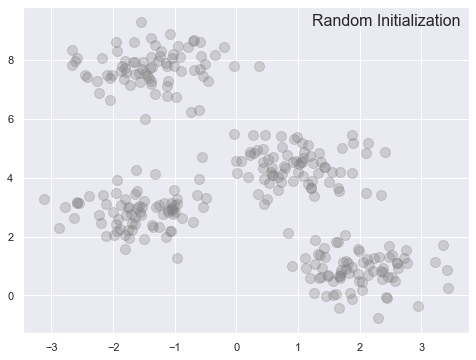

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig0 = plt.figure(figsize=(8,6))
ax0 = plt.axes()
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)


fig0.savefig('kmeans-figures/kmeans-initial.png')

## 2. Iterations to find the optimal clustering

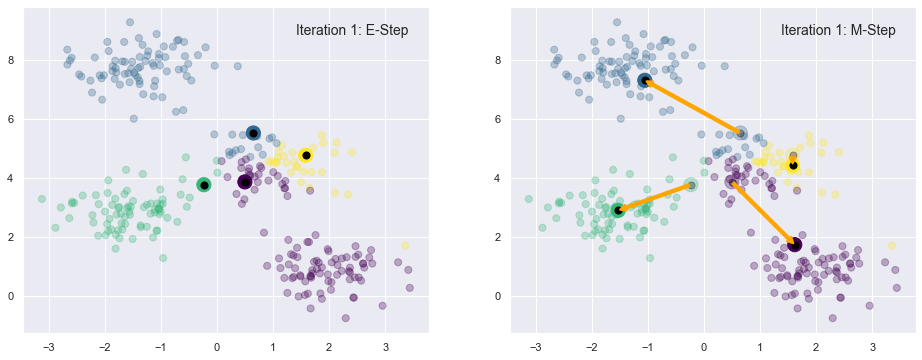

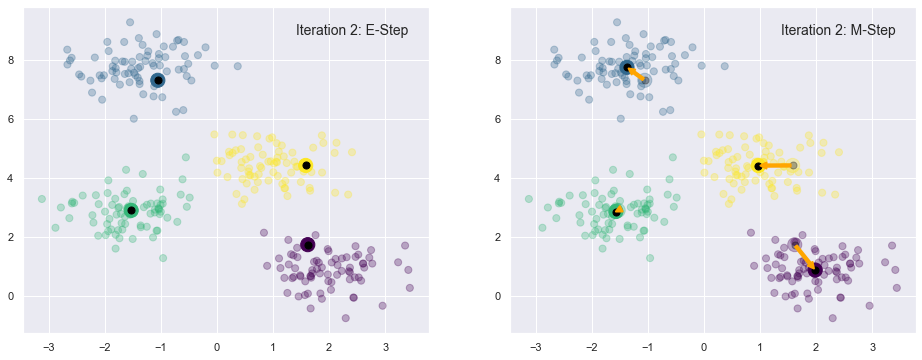

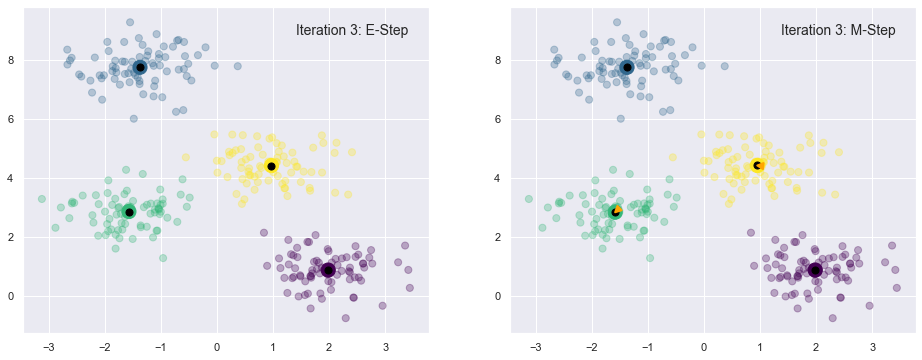

In [102]:
for i in range(3):
    
    figi, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    ax1.text(0.95, 0.95, 'Iteration %g: E-Step' %(i+1), transform=ax1.transAxes, ha='right', va='top', size=14)
    
    
    # M-step
    new_centers = np.array([X[y_pred == j].mean(0) for j in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    ax2.text(0.95, 0.95, 'Iteration %g: M-Step' %(i+1), transform=ax2.transAxes, ha='right', va='top', size=14)
    for j in range(4):
        ax2.annotate('', new_centers[j], centers[j],
                     arrowprops=dict(color='orange', arrowstyle='simple', linewidth=2))
    figi.savefig('kmeans-figures/kmeans-iteration%g.png' %(i+1))
  
    
    # Finish iteration
    centers = new_centers

    




## 3. Final result

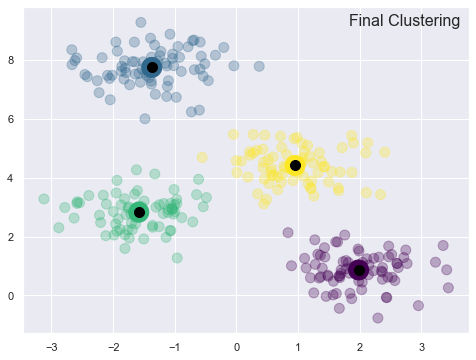

In [103]:
# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)

figf= plt.figure(figsize=(8,6))
axf= plt.axes()

draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

figf.savefig('kmeans-figures/kmeans-final.png')